In [2]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
file_path = '/Volumes/LACIE SETUP/Data_Science/Data_Analysis_Viz_InPython/Example_Projects/train.csv'

# reader = csv.reader(open(file_path, "rb"),delimiter=',',quoting=csv.QUOTE_NONE)

# with open(file_path) as train_fp:
#     for line in train_fp:
#        print(line)

In [38]:
titanic_df = pd.read_csv(file_path)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

# 1) Who were the passengers on the Titanic? (Ages,Gender,Class,...etc)

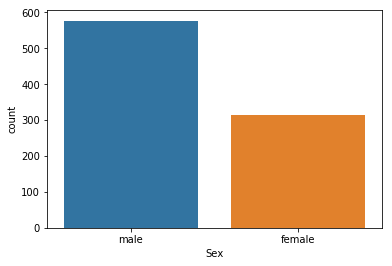

In [40]:
# Syntax to check gender since we need to know who were the passengers on the Titanic
# You can accomplish this by using seaborn's '.countplot()' method passing a column argument
# sns.set() puts framing in the background of your graph(makes it look more professional)
# '.factorplot()' function provides all columns in the resulting datasets

sns.countplot('Sex',data=titanic_df)

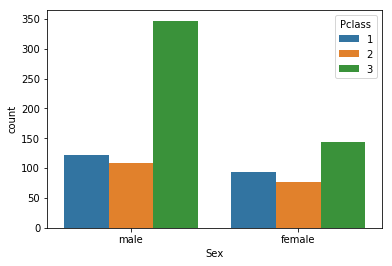

In [41]:
# Separating genders by classes
sns.countplot('Sex',data=titanic_df,hue='Pclass')

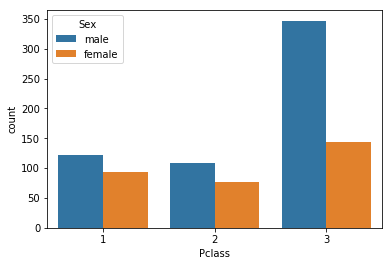

In [42]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [43]:
# We want to find men, women and children on the titanic. We will be using the 'apply' technique to handle this
# Here we will create the function to determine if the passenger is man, woman, or child
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [44]:
# Defining a new column called 'Person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [45]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


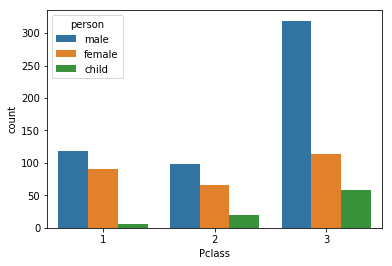

In [46]:
sns.countplot('Pclass',data=titanic_df,hue='person')

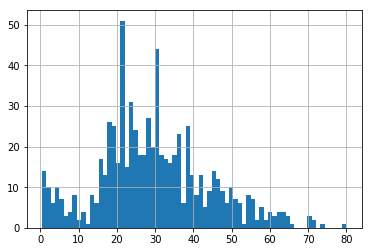

In [47]:
# Creating a distribution of the ages to get a better picture of who the passengers really were by creating a 
# histogram
titanic_df['Age'].hist(bins=70)

In [48]:
titanic_df['Age'].mean()

29.69911764705882

In [49]:
# Overall comparison of male vs. female vs. child using .value_counts() method; counts unique values
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

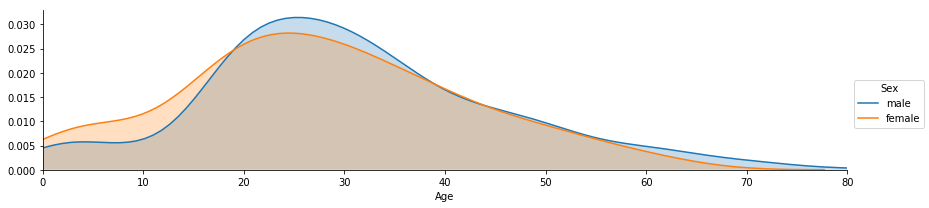

In [50]:
# We can use a FacetGrid to plot multiple KDE plots on one plot
# This snytax creates a figure
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
# Using the .map() function to plot all the possible KDE plots for the Age columns, by hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Setting X max limit by the oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

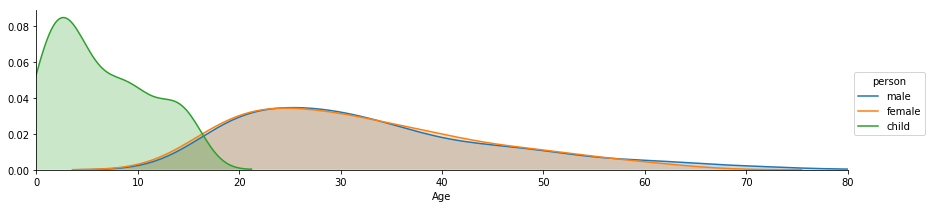

In [51]:
# We can use a FacetGrid to plot multiple KDE plots on one plot
# This snytax creates a figure
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
# Using the .map() function to plot all the possible KDE plots for the Age columns, by hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Setting X max limit by the oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

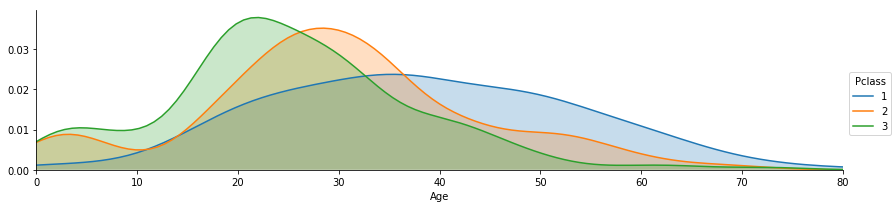

In [52]:
# We can use a FacetGrid to plot multiple KDE plots on one plot
# This snytax creates a figure
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
# Using the .map() function to plot all the possible KDE plots for the Age columns, by hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Setting X max limit by the oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

# 2.) What deck were the passengers on and how does that relate to their class?

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [54]:
deck = titanic_df['Cabin'].dropna()

In [55]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

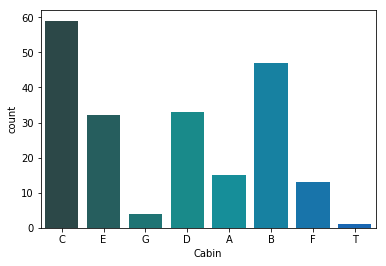

In [56]:
# Setting an empty list called levels
# Look up Matplotlib plus color maps to get a range of palettes; _d makes the palette darker
levels = []

for level in deck:  # grabs the first character in the deck level and appends that character to the list
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

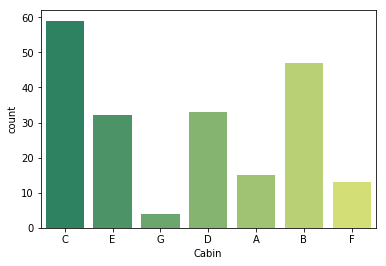

In [57]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.countplot('Cabin',data=cabin_df,palette='summer')

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


# 3.) Where did the passengers come from?

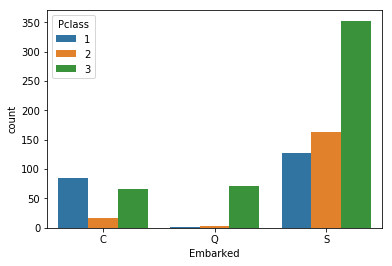

In [59]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

# 4.) Who was alone and who was with family?

In [60]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [61]:
# In order to find out if a passenger was alone we're adding the SibSp=Siblings_on_board + Parch=Parents_on_board
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [62]:
# If the column is anything but zero,0, the passenger was not alone
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [63]:
# More information on the warning message above
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

# This is how you use conditional statements to replace values in DF columns in Pandas

In [64]:
# Since the '.loc' function in Pandas takes an [x,y,etc..] arguments, you could have made 'mask'= 'x'(row_value)
mask = titanic_df.Alone > 0
column_name = 'Alone'
titanic_df.loc[mask, column_name] = 'With Family'

In [65]:
mask2 = titanic_df.Alone == 0
column_name = 'Alone'
titanic_df.loc[mask2, column_name] = 'Alone'

In [66]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


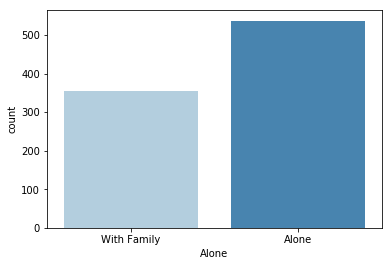

In [68]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

# 5.) What Factors Helped Someone Survive the Titanic Crash/Sinking?
Taking A Deeper Dive Into the Data:

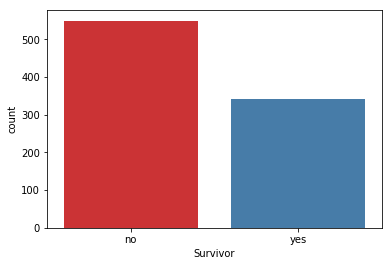

In [69]:
# Creating a new column through mapping by passing an dictionary with keys.
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

# Overall view of who lived and who died
sns.countplot('Survivor',data=titanic_df,palette='Set1')

- Which factors played into people surviving vs. not surving?
- Whic factors had different effects on their survival rates

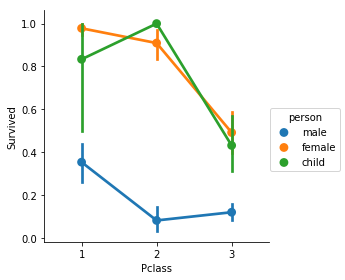

In [72]:
# Trying to see if class was a factor in surviving
# When to use a .factorplot vs. a .countplot:  use the .factorplot when comparing more than 1 column
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

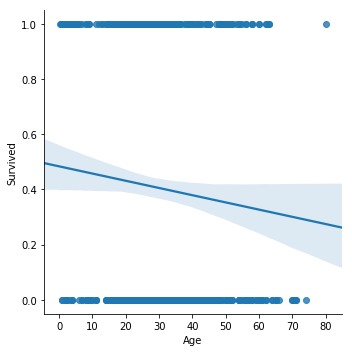

In [73]:
# Is 'Age' a factor on survival? We can use a linear plot to determine if there is any effect
sns.lmplot('Age','Survived',data=titanic_df)

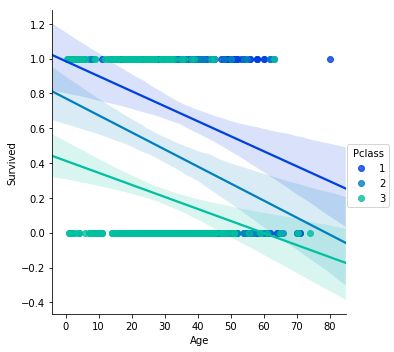

In [74]:
# Is 'Class' & 'Age' a factor on survival? Use the hue param to help determine this
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

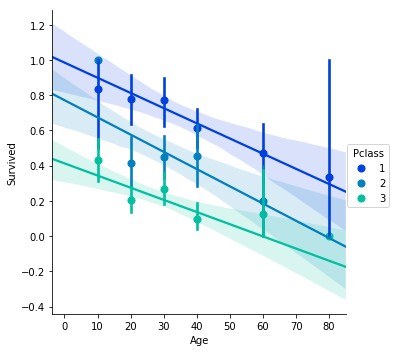

In [75]:
# Creating a list 'generations' which houses 6 bins of age groups, grab all the points closest to these and bin
# them, then run a std deviation (std) on that.
# This approach helps give a better and clearer picture of the data
generations = [10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

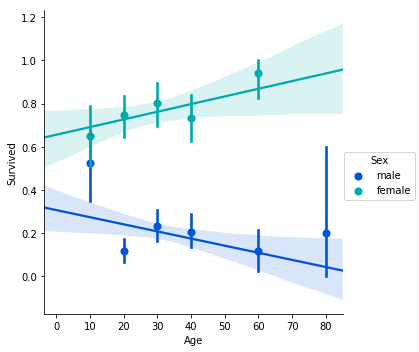

In [77]:
# How Gender and Age affect survival sets
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

# Additional Exploration of the Data

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your
intuition?

2.) Did having a family member increase the odds of surviving the crash?